<a href="https://colab.research.google.com/github/GrimWatch/ai-tests/blob/main/ml_lets_goo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline
#commit by grim

In [17]:
url = "https://raw.githubusercontent.com/GrimWatch/ai-tests/main/housing.csv"
data = pd.read_csv(url)
#data= data0.head(5)
data['index'] = data.index

In [18]:
data = data.dropna()

In [19]:

data = data.head(4000)

In [38]:
d = data['total_bedrooms'].value_counts()
print(d)


280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2205.0     1
1448.0     1
1691.0     1
2537.0     1
2546.0     1
Name: total_bedrooms, Length: 1923, dtype: int64


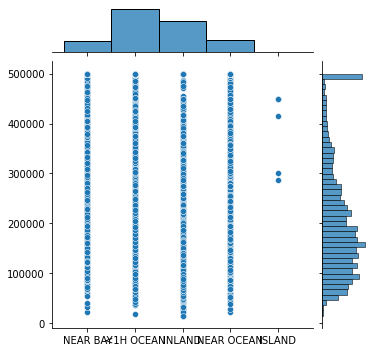

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [13]:
sns.jointplot(x=data.ocean_proximity.values, y=data.median_house_value.values, height=5)
plt.ylabel("price")

plt.xlabel("ocean")
plt.show()
sns.despine

In [20]:
labels = data['median_house_value']
conv_ocean = [3 if values == "<1H OCEAN" else 2 if values == "INLAND" 
              else 1 if values == "NEAR OCEAN" 
              else 0 for values in data.ocean_proximity ]
data['ocean_proximity'] = conv_ocean
train1 = data.drop(['index','median_house_value'],axis =1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels ,test_size = 0.10, random_state = 3)

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [24]:
reg.fit(x_train,y_train)

LinearRegression()

In [25]:
reg.score(x_test,y_test)

0.760303680204794

In [27]:
from sklearn import ensemble

In [32]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 200 , max_depth = 5,
      min_samples_split =2, learning_rate = 0.1 , loss = 'squared_error')

In [33]:
clf.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200)

In [34]:
clf.score(x_test,y_test)

0.9038392547079407

In [35]:
from sklearn.ensemble import RandomForestRegressor # Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 15)# Train the model on training data

In [36]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=15)

In [37]:
rf.score(x_test,y_test)

0.8997725028151755